In [1]:
import tweepy
import re
import pickle
from tweepy import OAuthHandler

#Initializing the keys
consumer_key='D5XpyhP9h4SCGgTkK9Kt4tPNF'
consumer_secret='2OTmoyvVOJaqhsxc78VfG7g8cPXl9Hw2cMu7SOsF5rDgcZHuKm'
access_token='1067509178493616128-OO8YwijyjUiLRm4Suu5qSmL7Pg6x5I'
access_secret='JXCa287qeLV68jWlVDOkW3qURb9vh33K3OWFQH0fUg9dd'

In [2]:
auth=OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
args=['facebook']
api=tweepy.API(auth,timeout=10)

list_tweets=[]
query=args[0]
if len(args)==1 :
    for status in tweepy.Cursor(api.search,q=query+ " -filter:retweets", lang='en',result_type='recent').items(100):
        list_tweets.append(status.text) #Here Status is a JSON file, so we want only text

In [3]:
list_tweets

['https://t.co/WZAVx1Bt0U\n\nWant to buy, sell or swap...? Find out more using the link above. Dickernet.....trade got better.',
 'Contrary to popular understanding, karma is not a cosmic retribution scale. Karma is not you messed up and now (wha… https://t.co/13weUbX7oH',
 "Hey Gents&amp;Dandy's Rec. thanks for the follow! Please also have a look on my Facebook Artistpage https://t.co/pSPINXAs0x",
 'fuck it’s my bday now i gotta spend all day typing “thank u so much!” to every facebook post from my moms friends',
 'Following a public hearing between international lawmakers and a senior #Facebook executive, the U.S. company relea… https://t.co/bVkcrx69TE',
 'Check out these sweet prizes!!!! Get registered! https://t.co/4kxgVCZdsL',
 'Nah if í had a woman This would make her uncomfortable añd she takin pics but she supposed to be cuttin Hair unprof… https://t.co/v3U2j879t1',
 '"We use #Cherwell with our #IT department, and other departments as well such as #HR. It was flexible and met n

In [4]:
with open('tfidfmodel.pickle','rb') as f:
    vectorizer=pickle.load(f)
    
with open('classifier.pickle','rb') as f:
    clf=pickle.load(f)
    
total_pos=0
total_neg=0
    
for tweet in list_tweets:
    tweet=re.sub(r"^https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," ",tweet)
    tweet=re.sub(r"that's","that is ",tweet)
    tweet=re.sub(r"there's","there is ",tweet)
    tweet=re.sub(r"what's","what is ",tweet)
    tweet=re.sub(r"where's","where is ",tweet)
    tweet=re.sub(r"it's","it is ",tweet)
    tweet=re.sub(r"who's","who is ",tweet)
    tweet=re.sub(r"i'm","i am ",tweet)
    tweet=re.sub(r"she's","she is ",tweet)
    tweet=re.sub(r"he's","he is ",tweet)
    tweet=re.sub(r"they're","they are ",tweet)
    tweet=re.sub(r"who're","who are ",tweet)
    tweet=re.sub(r"ain't","am not ",tweet)
    tweet=re.sub(r"wouldn't","would not ",tweet)
    tweet=re.sub(r"shouldn't","should not ",tweet)
    tweet=re.sub(r"can't","cannot ",tweet)
    tweet=re.sub(r"couldn't","could not ",tweet)
    tweet=re.sub(r"won't","will not ",tweet)
    tweet=re.sub(r"\W"," ",tweet)
    tweet=re.sub(r"s+[a-z]\s+"," ",tweet)
    tweet=re.sub(r"\s+[a-z]$"," ",tweet)
    tweet=re.sub(r"^[a-z]\s+"," ",tweet)
    tweet=re.sub(r"\s+"," ",tweet)
    sent=clf.predict(vectorizer.transform([tweet]).toarray())
    print(tweet)
    print(sent)
    
    if(sent[0]==1):
        total_pos=total_pos+1
    else:
        total_neg=total_neg+1

 Want to buy sell or swap Find out more using the link above Dickernet trade got better 
[0]
Contrary to popular understanding karma is not a cosmic retribution scale Karma is not you messed up and now wha 
[1]
Hey Gents amp Dandy s Rec thanks for the follow Plea al have a look on my Facebook Artistpage 
[1]
fuck it s my bday now i gotta spend all day typing thank u much to every facebook po from my moms friends
[1]
Following a public hearing between international lawmakers and a senior Facebook executive the U S company relea 
[1]
Check out the sweet prizes Get registered 
[0]
Nah if í had a woman This would make her uncomfortable añd she takin pics but she supposed to be cuttin Hair unprof 
[0]
 We u Cherwell with our IT department and other departments as well such as HR It was flexible and met not o 
[1]
Inspiration from Blue Moon Reiki 
[1]
THE DIFFERENCES BETWEEN THE OLD AND NEW TESTAMENTS Episode 2 Technical Issues The Old Testament is revelation an 
[1]
TOMORROW NIGHT we have p

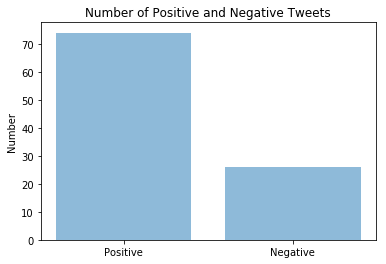

In [5]:
import matplotlib.pyplot as plt
import numpy as np
objects=['Positive','Negative']
y_pos=np.arange(len(objects))
plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Positive and Negative Tweets')
plt.show()